#Importamos la base de datos

Usaremos las credenciales de google para acceder a nuestro drive de esta forma podremos visitrar nuestros archivos sin necesidad de subirlos al entorno cada que lo queramos usar.

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
spam_or_ham = pd.read_csv("/content/drive/MyDrive/spam.csv", encoding='latin-1')[["v1", "v2"]]
spam_or_ham.columns = ["label", "text"]
spam_or_ham.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
spam_or_ham["label"].value_counts()

ham     4825
spam     747
Name: label, dtype: int64

#Tokenizacion

El objetivo de la tokenización es preparar el texto para el procesamiento de lenguaje natural, ya que la mayoría de los algoritmos de NLP requieren que el texto se divida en tokens para poder trabajar con él. Al dividir el texto en tokens, se pueden realizar diversas tareas de NLP, como la identificación de palabras clave, la extracción de información y la categorización de texto.


In [ ]:
import string
punctuation = set(string.punctuation)
def tokenize(sentence):
    tokens = []
    for token in sentence.split():
        new_token = []
        for character in token:
            if character not in punctuation:
                new_token.append(character.lower())
        if new_token:
            tokens.append("".join(new_token))
    return tokens

In [ ]:
# Ejemplo de uso
sentence = "Hola! Esta es una prueba para la función tokenize. ¿Funcionará correctamente?"
tokens = tokenize(sentence)
print(tokens)


['hola', 'esta', 'es', 'una', 'prueba', 'para', 'la', 'función', 'tokenize', '¿funcionará', 'correctamente']


In [ ]:
spam_or_ham.head()["text"].apply(tokenize)

0    [go, until, jurong, point, crazy, available, o...
1                       [ok, lar, joking, wif, u, oni]
2    [free, entry, in, 2, a, wkly, comp, to, win, f...
3    [u, dun, say, so, early, hor, u, c, already, t...
4    [nah, i, dont, think, he, goes, to, usf, he, l...
Name: text, dtype: object

#Creacion de las caracteristicas del modelo y entrenamiento

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
demo_vectorizer = CountVectorizer(
    tokenizer = tokenize,
    binary = True,
    stop_words= 'english'
)

In [ ]:
from sklearn.model_selection import train_test_split
train_text, test_text, train_labels, test_labels = train_test_split(spam_or_ham["text"], spam_or_ham["label"], stratify=spam_or_ham["label"])
print(f"Training examples: {len(train_text)}, testing examples {len(test_text)}")

Training examples: 4179, testing examples 1393


In [ ]:
real_vectorizer = CountVectorizer(tokenizer = tokenize, binary=True)
train_X = real_vectorizer.fit_transform(train_text)
test_X = real_vectorizer.transform(test_text)

In [ ]:
from sklearn.svm import LinearSVC
classifier = LinearSVC()
classifier.fit(train_X, train_labels)
LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

LinearSVC()

#Evaluacion del Modelo y Analisis

In [ ]:
from sklearn.metrics import accuracy_score
predicciones = classifier.predict(test_X)
accuracy = accuracy_score(test_labels, predicciones)
print(f"Accuracy: {accuracy:.4%}")


Accuracy: 97.9182%


In [ ]:
frases = [
  'Congratulations, you have been selected to receive a free vacation!',
  'Don t miss out on this amazing opportunity to make money fast!',
  'Limited time offer: Buy one, get one free on all products!',
  'You have won a prize! Click here to claim it now.',
  'Increase your income by working from home. No experience necessary!',
  'Hi, just wanted to touch base and see how you re doing.',
  'Thank you for your recent purchase. We hope you are satisfied with your product.',
  'I wanted to follow up with you regarding our meeting last week.',
  'Reminder: Your appointment is scheduled for tomorrow at 2 PM.',
  'I am writing to apply for the open position at your company.'
]

In [ ]:
frases_X = real_vectorizer.transform(frases)
predicciones = classifier.predict(frases_X)

In [ ]:
for text, label in zip(frases, predicciones):
  print(f"{label:10} - {text}")

spam       - Congratulations, you have been selected to receive a free vacation!
ham        - Don t miss out on this amazing opportunity to make money fast!
ham        - Limited time offer: Buy one, get one free on all products!
spam       - You have won a prize! Click here to claim it now.
ham        - Increase your income by working from home. No experience necessary!
ham        - Hi, just wanted to touch base and see how you re doing.
ham        - Thank you for your recent purchase. We hope you are satisfied with your product.
ham        - I wanted to follow up with you regarding our meeting last week.
ham        - Reminder: Your appointment is scheduled for tomorrow at 2 PM.
ham        - I am writing to apply for the open position at your company.


In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Obtenemos las predicciones sobre los datos de prueba
predicciones = classifier.predict(test_X)

# Calculamos la matriz de confusión
cm = confusion_matrix(test_labels, predicciones, labels=['ham', 'spam'])

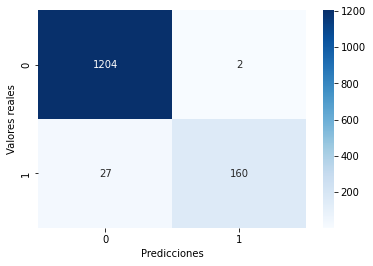

In [ ]:
# Graficamos la matriz de confusión
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicciones')
plt.ylabel('Valores reales')
plt.show()

In [ ]:
# Calculamos las métricas de evaluación del modelo
from sklearn.metrics import precision_score, recall_score, f1_score
precision = precision_score(test_labels, predicciones, pos_label='spam')
recall = recall_score(test_labels, predicciones, pos_label='spam')
f1 = f1_score(test_labels, predicciones, pos_label='spam')
print(f"Precision: {precision:.4%}")
print(f"Recall: {recall:.4%}")
print(f"F1 score: {f1:.4%}")

Precision: 98.7654%
Recall: 85.5615%
F1 score: 91.6905%


In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lr_model = LogisticRegression(solver='liblinear')
lr_model.fit(train_X,train_labels)

LogisticRegression(solver='liblinear')

In [ ]:
from sklearn.metrics import plot_confusion_matrix,classification_report,plot_precision_recall_curve,plot_roc_curve

In [ ]:
def report(model):
    preds = model.predict(test_X)
    print(classification_report(preds,test_labels))
    plot_confusion_matrix(model,test_X,test_labels)
    plot_precision_recall_curve(model,test_X,test_labels)
    plot_roc_curve(model,test_X,test_labels)

In [ ]:
#Nuevo vectorizador para contar la frecuencia de las palabras
spam_vectorizer = CountVectorizer(tokenizer=tokenize, binary=False, stop_words = 'english')

spam_X = spam_vectorizer.fit_transform(spam_or_ham[spam_or_ham['label'] == 'spam']['text'])

spam_word_freq = dict(zip(spam_vectorizer.get_feature_names(), np.asarray(spam_X.sum(axis=0)).ravel()))

spam_word_freq = {k: v for k, v in sorted(spam_word_freq.items(), key=lambda item: item[1], reverse=True)}


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


#Visualizacion de datos


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


LOGISTIC REGRESSION MODEL
              precision    recall  f1-score   support

         ham       1.00      0.98      0.99      1233
        spam       0.86      1.00      0.92       160

    accuracy                           0.98      1393
   macro avg       0.93      0.99      0.96      1393
weighted avg       0.98      0.98      0.98      1393



/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


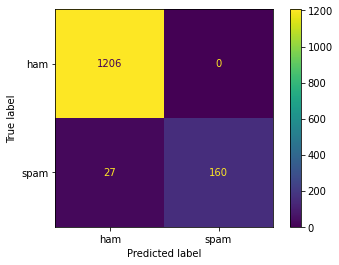

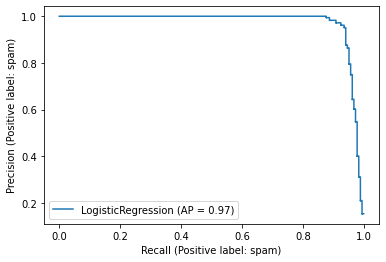

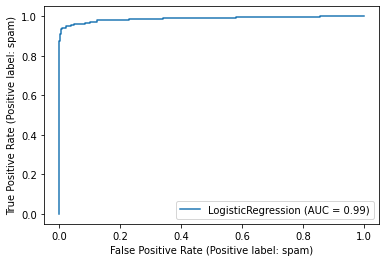

In [ ]:
print("LOGISTIC REGRESSION MODEL")
report(lr_model)

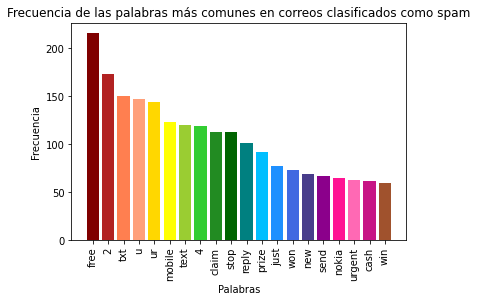

In [ ]:
import matplotlib.pyplot as plt

# Obtenemos las 20 palabras más comunes
top_words = list(spam_word_freq.keys())[:20]
word_freq = list(spam_word_freq.values())[:20]

colors = ['#800000', '#B22222', '#FF7F50', '#FFA07A', '#FFD700', '#FFFF00', '#9ACD32', '#32CD32', '#228B22', '#006400', '#008080', '#00BFFF', '#1E90FF', '#4169E1', '#483D8B', '#8B008B', '#FF1493', '#FF69B4', '#C71585', '#A0522D']

# Creamos un gráfico de barras para visualizar la frecuencia de las palabras
plt.bar(top_words, word_freq, color = colors)
plt.xticks(rotation=90)
plt.title('Frecuencia de las palabras más comunes en correos clasificados como spam')
plt.xlabel('Palabras')
plt.ylabel('Frecuencia')
plt.show()


In [ ]:
!pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from wordcloud import WordCloud

In [ ]:
spam_text = ' '.join(top_words)

In [ ]:
wordcloud = WordCloud(background_color='black', width=800, height=400, colormap='tab20').generate(spam_text)

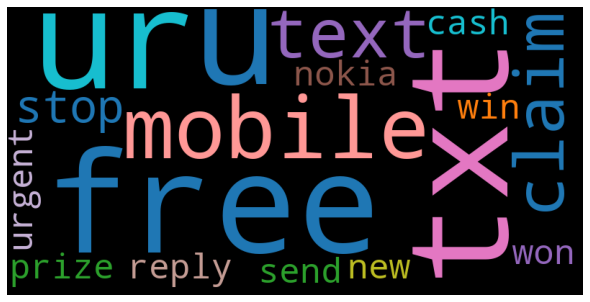

In [ ]:
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()